# Sheet 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## 1 Principal Component Analysis
### a

In [2]:
# TODO: implement PCA (fill in the blanks in the function below)

def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    X = data - data.mean(axis=1, keepdims=True)
    
    # compute X times X transpose
    XX_T = X @ X.T
    
    # compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(XX_T)
    
    # ensure real values (in case of numerical errors leading to small imaginary parts)
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    
    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    sorted_indices = np.argsort(eigenvalues)[::-1]  # descending order
    components = eigenvectors[:, sorted_indices[:n_components]].T
    
    # compute X_projected, the projection of the data to the components
    X_projected = components @ X
    
    return components, X_projected  # return the n_components first components and the pca projection of the data


In [3]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

Test successful!


### b
Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [4]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)
unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f'Class {label_names[int(label)]}: {count} samples')

features.shape=(116, 2233), labels.shape=(2233,)
Class b: 999 samples
Class c: 864 samples
Class q: 370 samples


Normalize the data

In [5]:
# TODO: report range of features and normalize the data to zero mean and unit variance
print('Feature ranges before normalization:')
for i in range(features.shape[0]):
    feature_min = features[i].min()
    feature_max = features[i].max()
    print(f'Feature {i}: min={feature_min:.4f}, max={feature_max:.4f}, range={feature_max - feature_min:.4f}')

# Normalize to zero mean and unit variance
features_normalized = (features - features.mean(axis=1, keepdims=True)) / features.std(axis=1, keepdims=True)

print('\nAfter normalization:')
print(f'Mean: {features_normalized.mean(axis=1)}')
print(f'Std: {features_normalized.std(axis=1)}')

Feature ranges before normalization:
Feature 0: min=0.5858, max=1.0563, range=0.4706
Feature 1: min=-0.3240, max=0.3001, range=0.6241
Feature 2: min=-139.6278, max=145.8169, range=285.4448
Feature 3: min=11.6525, max=20713.9564, range=20702.3039
Feature 4: min=99860.3722, max=100145.8169, range=285.4448
Feature 5: min=-1.0000, max=-0.9783, range=0.0217
Feature 6: min=149256.8301, max=2725986.9413, range=2576730.1111
Feature 7: min=94.0234, max=231315.8411, range=231221.8177
Feature 8: min=155058.3648, max=2728662.5178, range=2573604.1530
Feature 9: min=-134437.8431, max=59292.7220, range=193730.5650
Feature 10: min=-96619.3677, max=188237.8408, range=284857.2085
Feature 11: min=149077.9934, max=2725850.6003, range=2576772.6069
Feature 12: min=12928.3681, max=197132.5410, range=184204.1729
Feature 13: min=12928.3681, max=197132.5410, range=184204.1729
Feature 14: min=0.6189, max=0.9555, range=0.3366
Feature 15: min=-0.4623, max=0.3001, range=0.7624
Feature 16: min=-139.6418, max=141.843

### c
Apply PCA to reduce dimensionality to 2D

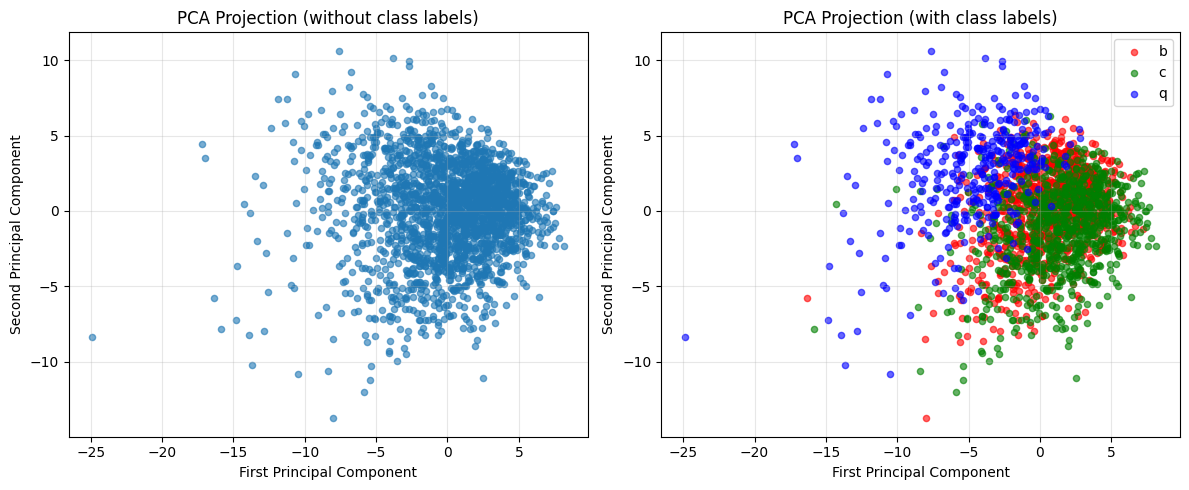


Variance explained by first 2 components:
PC1: 11.81%
PC2: 8.78%
Total: 20.59%


In [6]:
# Apply PCA to reduce to 2 dimensions
components, projection = pca(features_normalized, n_components=2)

# Create scatter plot
plt.figure(figsize=(12, 5))

# Plot 1: Without class coloring
plt.subplot(1, 2, 1)
plt.scatter(projection[0], projection[1], alpha=0.6, s=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection (without class labels)')
plt.grid(True, alpha=0.3)

# Plot 2: With class coloring for comparison
plt.subplot(1, 2, 2)
colors = ['red', 'green', 'blue']
for i, (label_name, color) in enumerate(zip(label_names, colors)):
    mask = labels == i
    plt.scatter(projection[0, mask], projection[1, mask], 
                c=color, label=label_name, alpha=0.6, s=20)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection (with class labels)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f'\nVariance explained by first 2 components:')
# Compute variance from eigenvalues
all_components, all_projections = pca(features_normalized)
eigenvalues = np.var(all_projections, axis=1)
total_variance = eigenvalues.sum()
explained_variance_ratio = eigenvalues[:2] / total_variance
print(f'PC1: {explained_variance_ratio[0]:.2%}')
print(f'PC2: {explained_variance_ratio[1]:.2%}')
print(f'Total: {explained_variance_ratio.sum():.2%}')

## 2 Robust PCA

### a

Data shape: (2, 31)


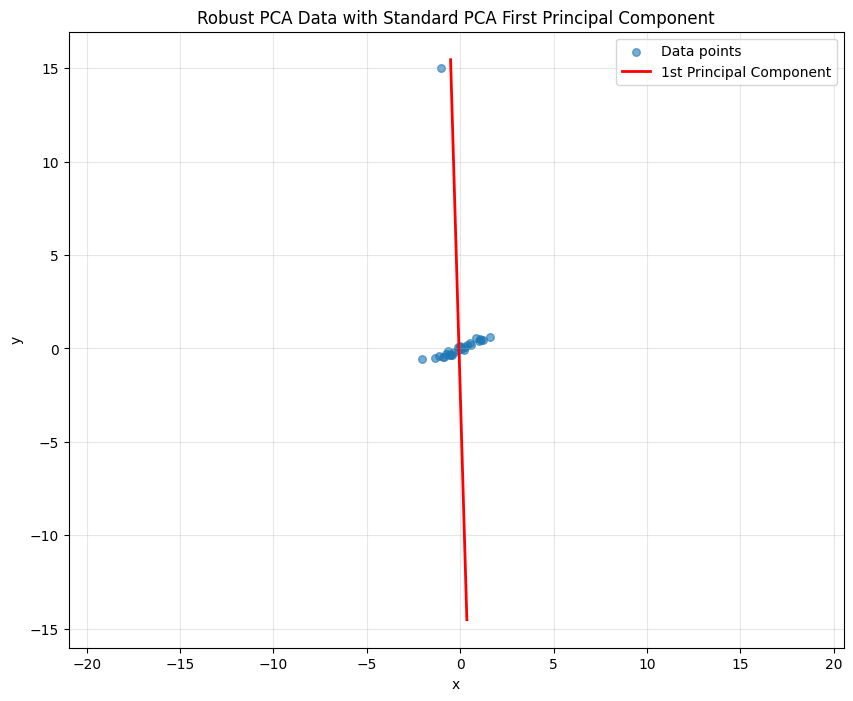

First principal component direction: [ 0.0290345  -0.99957841]


In [7]:
# load data
data = np.load('data/robust_pca_data.npy')

print(f'Data shape: {data.shape}')

# TODO: Perform standard PCA and plot the first principal component in a scatter plot of the data
# Assuming data is 2 x N (2 features, N samples)
# Center the data
data_centered = data - data.mean(axis=1, keepdims=True)

# Perform PCA
components, projection = pca(data_centered, n_components=1)
principal_component = components[0]

# Create scatter plot with the first principal component
plt.figure(figsize=(10, 8))
plt.scatter(data[0], data[1], alpha=0.6, s=30, label='Data points')

# Plot the principal component as a line through the origin (centered data)
# The line is parameterized as mean + t * principal_component
mean_point = data.mean(axis=1)
t_range = np.linspace(-15, 15, 100)
pc_line = mean_point[:, np.newaxis] + np.outer(principal_component, t_range)
plt.plot(pc_line[0], pc_line[1], 'r-', linewidth=2, label='1st Principal Component')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Robust PCA Data with Standard PCA First Principal Component')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print(f'First principal component direction: {principal_component}')

### b

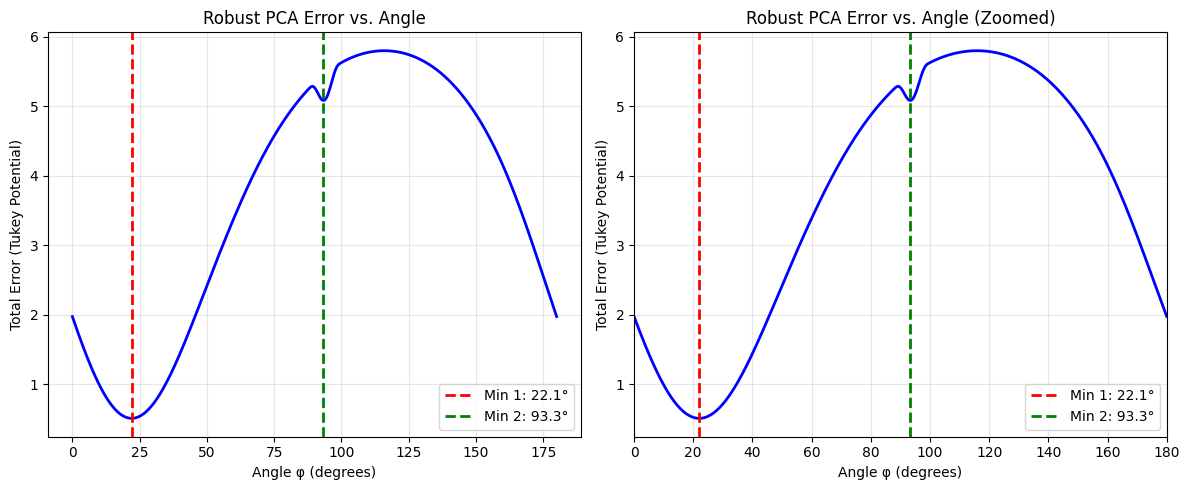


Two main minima found at:
φ₁ = 22.06° (φ = 0.3850 rad) - Error: 0.5131
φ₂ = 93.26° (φ = 1.6277 rad) - Error: 5.0845
Difference: 71.20°

Interpretation:
Das erste Minimum (~22°) entspricht der robusten Hauptkomponente,
die die Hauptmasse der Daten erfasst und den Outlier ignoriert.
Das zweite Minimum  entspricht dem outlier.
Das Tukey-Potential begrenzt den Einfluss von Ausreißern durch Sättigung.


In [8]:
# TODO: Compute the first principal component in a robust way: Use the Tukey potential with the scale
# parameter s on the distances. Parameterize the line with the angle φ to the x-axis. Plot the error
# as a function of φ. Interpret the two minima.

def tukey_potential(r, s=1.0):
    """
    Tukey's biweight potential function.
    
    Parameters:
    r : distance
    s : scale parameter
    
    Returns:
    potential value
    """
    u = r / s
    # Tukey potential: (s^2/6) * (1 - (1 - (r/s)^2)^3) for |r| <= s, else s^2/6
    mask = np.abs(u) <= 1
    potential = np.zeros_like(r)
    potential[mask] = (s**2 / 6) * (1 - (1 - u[mask]**2)**3)
    potential[~mask] = s**2 / 6
    return potential

# Scale parameter (can be tuned based on data)
s = 1.5

# Range of angles to test
phi_range = np.linspace(0, np.pi, 360)
errors = []

# For each angle, compute the error using Tukey potential
for phi in phi_range:
    # Direction vector for this angle
    direction = np.array([np.cos(phi), np.sin(phi)])
    
    # Compute perpendicular distances from each point to the line through origin
    # Distance from point to line through origin with direction d: |x - (x·d)d|
    projections = data.T @ direction  # project each point onto the direction
    projected_points = np.outer(projections, direction)  # points on the line
    distances = np.linalg.norm(data.T - projected_points, axis=1)
    
    # Compute total error using Tukey potential
    error = np.sum(tukey_potential(distances, s))
    errors.append(error)

errors = np.array(errors)

# Find local minima using scipy
from scipy.signal import find_peaks

# Find local minima by inverting the signal
inverted_errors = -errors
peaks, properties = find_peaks(inverted_errors, prominence=0.1)

# Get the two deepest minima (lowest error values)
if len(peaks) >= 2:
    # Sort by actual error values (lowest error = best minimum)
    sorted_peaks = peaks[np.argsort(errors[peaks])]
    min_idx1 = sorted_peaks[0]
    min_idx2 = sorted_peaks[1]
else:
    # Fallback to simple minimum finding
    min_idx1 = np.argmin(errors)
    # Find minimum in opposite half
    if min_idx1 < len(errors) // 2:
        min_idx2 = len(errors) // 2 + np.argmin(errors[len(errors)//2:])
    else:
        min_idx2 = np.argmin(errors[:len(errors)//2])

phi_min1 = phi_range[min_idx1]
phi_min2 = phi_range[min_idx2]

# Plot the error as function of phi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(np.degrees(phi_range), errors, 'b-', linewidth=2)
plt.xlabel('Angle φ (degrees)')
plt.ylabel('Total Error (Tukey Potential)')
plt.title('Robust PCA Error vs. Angle')
plt.grid(True, alpha=0.3)
plt.axvline(np.degrees(phi_min1), color='r', linestyle='--', linewidth=2, label=f'Min 1: {np.degrees(phi_min1):.1f}°')
plt.axvline(np.degrees(phi_min2), color='g', linestyle='--', linewidth=2, label=f'Min 2: {np.degrees(phi_min2):.1f}°')
# Mark all local minima
if len(peaks) > 2:
    for peak in peaks[2:]:
        plt.axvline(np.degrees(phi_range[peak]), color='gray', linestyle=':', alpha=0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.degrees(phi_range), errors, 'b-', linewidth=2)
plt.xlabel('Angle φ (degrees)')
plt.ylabel('Total Error (Tukey Potential)')
plt.title('Robust PCA Error vs. Angle (Zoomed)')
plt.grid(True, alpha=0.3)
plt.xlim(0, 180)
plt.axvline(np.degrees(phi_min1), color='r', linestyle='--', linewidth=2, label=f'Min 1: {np.degrees(phi_min1):.1f}°')
plt.axvline(np.degrees(phi_min2), color='g', linestyle='--', linewidth=2, label=f'Min 2: {np.degrees(phi_min2):.1f}°')
plt.legend()

plt.tight_layout()
plt.show()

print(f'\nTwo main minima found at:')
print(f'φ₁ = {np.degrees(phi_min1):.2f}° (φ = {phi_min1:.4f} rad) - Error: {errors[min_idx1]:.4f}')
print(f'φ₂ = {np.degrees(phi_min2):.2f}° (φ = {phi_min2:.4f} rad) - Error: {errors[min_idx2]:.4f}')
print(f'Difference: {abs(np.degrees(phi_min2) - np.degrees(phi_min1)):.2f}°')
print(f'\nInterpretation:')
print(f'Das erste Minimum (~{np.degrees(phi_min1):.0f}°) entspricht der robusten Hauptkomponente,')
print(f'die die Hauptmasse der Daten erfasst und den Outlier ignoriert.')
print(f'Das zweite Minimum  entspricht dem outlier.')
print(f'Das Tukey-Potential begrenzt den Einfluss von Ausreißern durch Sättigung.')

### c

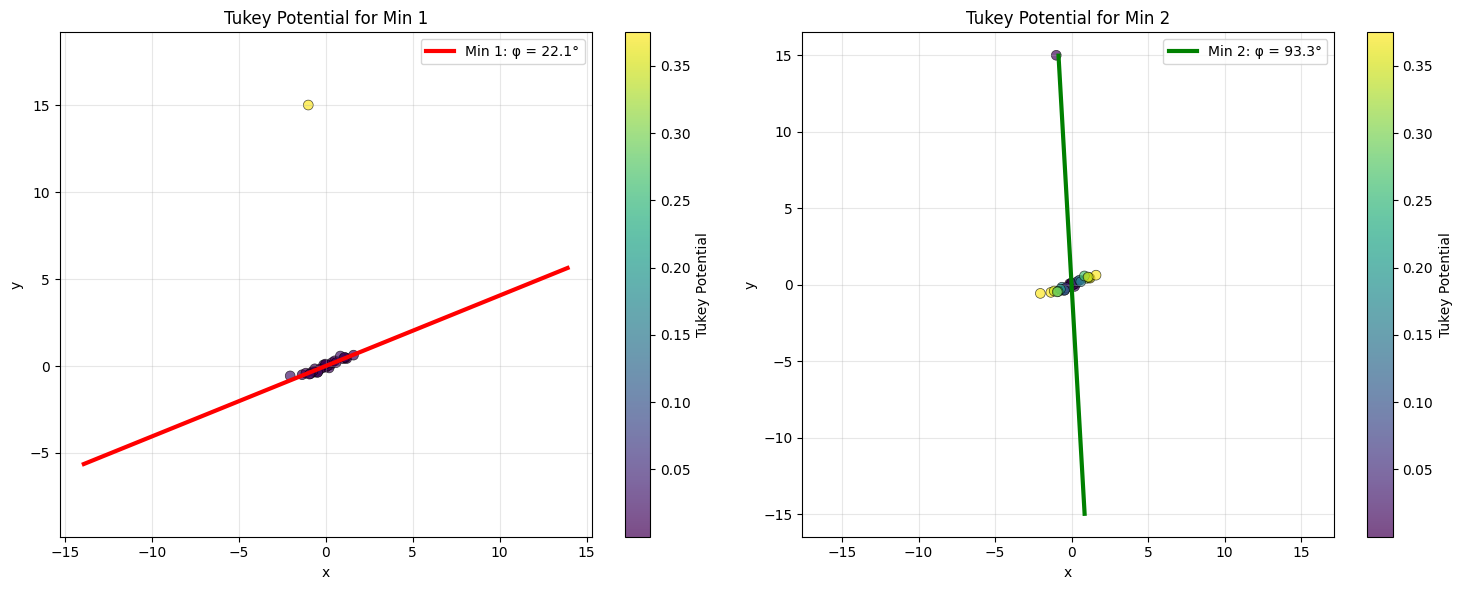


The color intensity shows the Tukey potential (error contribution) of each point.
Points closer to the line have lower potential (darker), while outliers have higher potential.
The Tukey potential saturates for large distances, limiting the influence of outliers.


In [9]:
# TODO: Plot the potential in the scatter plot for the two minima φ*.

plt.figure(figsize=(15, 6))

for idx, (phi, color, label) in enumerate([(phi_min1, 'red', 'Min 1'), (phi_min2, 'green', 'Min 2')]):
    plt.subplot(1, 2, idx+1)
    
    # Direction vector
    direction = np.array([np.cos(phi), np.sin(phi)])
    
    # Compute distances and potential for each point
    projections = data.T @ direction
    projected_points = np.outer(projections, direction)
    distances = np.linalg.norm(data.T - projected_points, axis=1)
    potentials = tukey_potential(distances, s)
    
    # Create scatter plot colored by potential
    scatter = plt.scatter(data[0], data[1], c=potentials, s=50, cmap='viridis', 
                          alpha=0.7, edgecolors='black', linewidth=0.5)
    
    # Plot the robust principal component line
    t_range = np.linspace(-15, 15, 100)
    pc_line = np.outer(t_range, direction)
    plt.plot(pc_line[:, 0], pc_line[:, 1], color=color, linewidth=3, 
             label=f'{label}: φ = {np.degrees(phi):.1f}°')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Tukey Potential for {label}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.colorbar(scatter, label='Tukey Potential')

plt.tight_layout()
plt.show()

print(f'\nThe color intensity shows the Tukey potential (error contribution) of each point.')
print(f'Points closer to the line have lower potential (darker), while outliers have higher potential.')
print(f'The Tukey potential saturates for large distances, limiting the influence of outliers.')

## Sheet 2) NR 1: Uniform Manifold Approximation and Projection

In [11]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import time
# 1) Load data
data_path = 'data/dijet_features_normalized.npy'
labels_path = 'data/dijet_labels.npy'
X = np.load(data_path)
labels = np.load(labels_path) if (__import__('os').path.exists(labels_path)) else None
print('raw X shape:', X.shape)
# If labels exist, try to align them with samples. If labels length matches columns, transpose X.
if labels is not None:
    print('raw labels shape:', labels.shape)
    if labels.shape[0] == X.shape[0]:
        print('Labels match number of rows -> using rows as samples')
    elif labels.shape[0] == X.shape[1]:
        print('Labels match number of columns -> transposing X to have samples as rows')
        X = X.T
        print('new X shape:', X.shape)
    else:
        print('Warning: labels length does not match rows or columns of X; ignoring labels')
        labels = None
# final sample count N (rows of X)
N = X.shape[0]
print('Number of samples N =', N)

raw X shape: (116, 2233)
raw labels shape: (2233,)
Labels match number of columns -> transposing X to have samples as rows
new X shape: (2233, 116)
Number of samples N = 2233


In [12]:
# 2) Build symmetrized kNN graph (k=15) and extract edges E
k = 15
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean').fit(X)
dists, inds = nbrs.kneighbors(X)
N = X.shape[0]
# Build directed adjacency then symmetrize
adj = np.zeros((N, N), dtype=bool)
for i in range(N):
    adj[i, inds[i]] = True
# symmetrize
adj = np.logical_or(adj, adj.T)
# extract edges as pairs i < j to avoid duplicates
edges_i, edges_j = np.where(np.triu(adj, k=1))
E = np.vstack([edges_i, edges_j]).T
print('Number of nodes N =', N)
print('Number of edges |E| =', E.shape[0])

Number of nodes N = 2233
Number of edges |E| = 24595


In [13]:
# 3) Sample random repulsive pairs: |R| = 5N
def sample_repulsive_pairs(N, factor=5, rng=None):
    # returns arrays (a,b) of shape (R,) with a != b
    if rng is None:
        rng = np.random.default_rng()
    R = int(factor * N)
    a = rng.integers(0, N, size=R, endpoint=False)
    b = rng.integers(0, N, size=R, endpoint=False)
    # avoid self-pairs by resampling those entries
    mask = (a == b)
    while mask.any():
        b[mask] = rng.integers(0, N, size=mask.sum(), endpoint=False)
        mask = (a == b)
    return a, b
# quick test
a, b = sample_repulsive_pairs(100, factor=5)
print('sampled repulsive pairs:', a.shape[0])

sampled repulsive pairs: 500


In [14]:
# 4) Parameters and initialization
c = 10.0  # repulsion strength
seed = 42
rng = np.random.default_rng(seed)
# 5) Initialize 2D embeddings
scale = 0.01
Y = rng.normal(scale=scale, size=(N, 2))
print('Initialized embeddings Y shape:', Y.shape)

Initialized embeddings Y shape: (2233, 2)


In [15]:
# 6) Force (gradient) computations using analytical derivatives
def compute_gradients(Y, E, rep_a, rep_b, c):
    # Y: (N,2), E: (M,2) with (i,j) pairs, rep_a/b: (R,)
    N = Y.shape[0]
    grad = np.zeros_like(Y)
    # Attractive term over edges E
    if E.shape[0] > 0:
        i = E[:, 0]
        j = E[:, 1]
        dif = Y[i] - Y[j]  # (M,2)
        d2 = np.sum(dif * dif, axis=1)  # (M,)
        denom = 1.0 + d2  # (M,)
        # gradient contribution: 2*(yi-yj)/(1+d2) for i; symmetric for j
        coef = (2.0 / denom)[:, None]  # (M,1)
        contrib = coef * dif  # (M,2)
        # accumulate
        np.add.at(grad, i, contrib)
        np.add.at(grad, j, -contrib)  # opposite sign for j
    # Repulsive term over sampled random pairs
    if rep_a.size > 0:
        a = rep_a
        b = rep_b
        difr = Y[a] - Y[b]  # (R,2)
        d2r = np.sum(difr * difr, axis=1)  # (R,)
        denom2 = (1.0 + d2r) ** 2  # (R,)
        coefr = (-2.0 * c / denom2)[:, None]  # (R,1)
        contribr = coefr * difr  # (R,2) this is grad for a
        np.add.at(grad, a, contribr)
        np.add.at(grad, b, -contribr)  # symmetric
    return grad

In [16]:
# 7) Optimization: gradient descent with decreasing learning rate
def optimize(Y, E, N, c, rng, n_iter=300, lr0=0.5, rep_factor=5, verbose=True):
    Y = Y.copy()
    history = {'loss': []}
    for it in range(n_iter):
        # linear learning-rate decay
        lr = lr0 * (1.0 - (it / float(n_iter)))
        # resample repulsive pairs each iteration
        a, b = sample_repulsive_pairs(N, factor=rep_factor, rng=rng)
        grad = compute_gradients(Y, E, a, b, c)
        # update positions (gradient descent)
        Y -= lr * grad
        # compute loss (optional) every 10 iters
        if (it % 10) == 0 or it == n_iter - 1:
            # attractive loss
            if E.shape[0] > 0:
                di = Y[E[:, 0]] - Y[E[:, 1]]
                d2i = np.sum(di * di, axis=1)
                loss_attr = np.sum(np.log(1.0 + d2i))
            else:
                loss_attr = 0.0
            # repulsive loss (estimate on sampled pairs)
            dr = Y[a] - Y[b]
            d2r = np.sum(dr * dr, axis=1)
            loss_rep = np.sum(c / (1.0 + d2r))
            loss = loss_attr + loss_rep
            history['loss'].append((it, loss_attr, loss_rep, loss))
            if verbose:
                print(f'it {it:4d}/{n_iter}  lr={lr:.4f}  loss_attr={loss_attr:.4e}  loss_rep={loss_rep:.4e}  total={loss:.4e}')
    return Y, history
# Run optimization (keep iterations modest for demo; increase as needed)
start = time.time()
Y_opt, history = optimize(Y, E, N, c, rng, n_iter=300, lr0=0.5, rep_factor=5, verbose=True)
print('Optimization time (s):', time.time() - start)

it    0/300  lr=0.5000  loss_attr=2.7232e+04  loss_rep=3.6079e+04  total=6.3310e+04
it   10/300  lr=0.4833  loss_attr=6.5987e+04  loss_rep=9.5244e+03  total=7.5511e+04
it   20/300  lr=0.4667  loss_attr=6.1906e+04  loss_rep=8.9342e+03  total=7.0840e+04
it   30/300  lr=0.4500  loss_attr=6.1852e+04  loss_rep=7.5037e+03  total=6.9356e+04
it   40/300  lr=0.4333  loss_attr=5.9280e+04  loss_rep=7.1517e+03  total=6.6432e+04
it   50/300  lr=0.4167  loss_attr=5.5931e+04  loss_rep=6.9223e+03  total=6.2853e+04
it   60/300  lr=0.4000  loss_attr=5.6606e+04  loss_rep=6.8719e+03  total=6.3478e+04
it   70/300  lr=0.3833  loss_attr=5.5412e+04  loss_rep=6.9626e+03  total=6.2375e+04
it   80/300  lr=0.3667  loss_attr=5.3822e+04  loss_rep=6.9836e+03  total=6.0805e+04
it   90/300  lr=0.3500  loss_attr=5.4049e+04  loss_rep=7.0371e+03  total=6.1086e+04
it  100/300  lr=0.3333  loss_attr=5.2471e+04  loss_rep=7.0515e+03  total=5.9523e+04
it  110/300  lr=0.3167  loss_attr=5.1366e+04  loss_rep=7.2349e+03  total=5.8

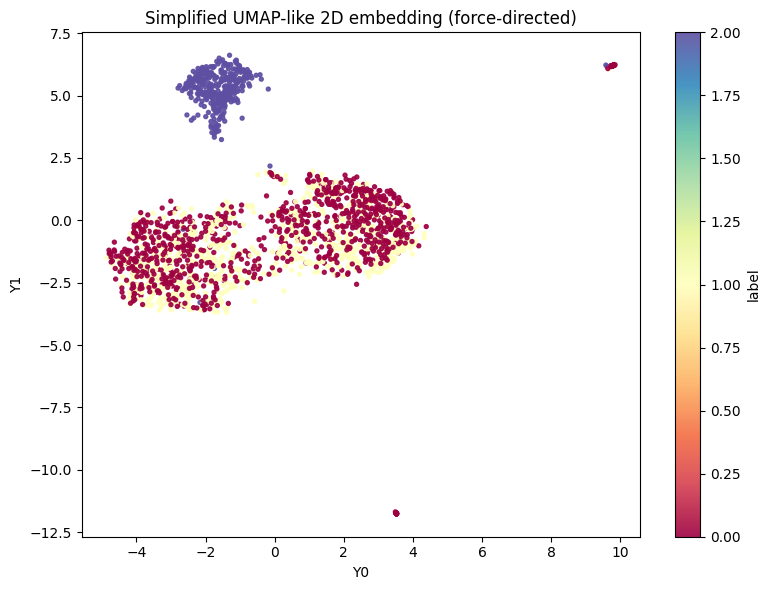

In [17]:
# 8) Plot final embedding colored by labels (if available)
plt.figure(figsize=(8, 6))
if labels is None:
    plt.scatter(Y_opt[:, 0], Y_opt[:, 1], s=5, alpha=0.8)
else:
    sc = plt.scatter(Y_opt[:, 0], Y_opt[:, 1], c=labels, s=8, cmap='Spectral', alpha=0.9)
    plt.colorbar(sc, label='label')
plt.title('Simplified UMAP-like 2D embedding (force-directed)')
plt.xlabel('Y0')
plt.ylabel('Y1')
plt.grid(False)
plt.tight_layout()
plt.show()